Limpieza de datos

In [ ]:
t1 = "Edmundo tiene una deuda de s/ 5,365,564.16. No debería postular!"
t2 = "Increíble. Edmundo le debe 5 millones al estado y se atreve a postular"
t3 = "La gente que le debe dinero al estado no debería poder postular :("
t4 = "Le debe s/5'000,000 al estado. Que se vaya a su casa!"
tweets = [t1,t2,t3,t4]
tweets

['Edmundo tiene una deuda de s/ 5,365,564.16. No debería postular!',
 'Increíble. Edmundo le debe 5 millones al estado y se atreve a postular',
 'La gente que le debe dinero al estado no debería poder postular :(',
 "Le debe s/5'000,000 al estado. Que se vaya a su casa!"]

In [ ]:
#que hace la funcion split
t1.split()
#separa las palabras usando los espacios en blanco

['Edmundo',
 'tiene',
 'una',
 'deuda',
 'de',
 's/',
 '5,365,564.16.',
 'No',
 'debería',
 'postular!']

In [ ]:
def CrearVocabularioInicial(corpus):
 vocabulario=set()
 for t in corpus:
   for d in t.split():
     vocabulario.add(d)
 return vocabulario

print("longitud del vocabulario inicial:", len(CrearVocabularioInicial(tweets)))

longitud del vocabulario inicial: 36


In [ ]:
import re

In [ ]:
for t in tweets:
  print(t)
print()

tweets2 = []
for t in tweets:
  t = re.sub("(s/\s?)?(\d+[',.]?)+\s*(millones|millón|millon|mills|mill|miles|mil)?",
         "DINERO ",t.lower())
  t=re.sub(r"\s\s+"," ",t)
  print(t)
  tweets2.append(t)

Edmundo tiene una deuda de s/ 5,365,564.16. No debería postular!
Increíble. Edmundo le debe 5 millones al estado y se atreve a postular
La gente que le debe dinero al estado no debería poder postular :(
Le debe s/5'000,000 al estado. Que se vaya a su casa!

edmundo tiene una deuda de DINERO no debería postular!
increíble. edmundo le debe DINERO al estado y se atreve a postular
la gente que le debe dinero al estado no debería poder postular :(
le debe DINERO al estado. que se vaya a su casa!


In [ ]:
print("longitud del vocabulario limpiado:", len(CrearVocabularioInicial(tweets2)))

longitud del vocabulario limpiado: 28


Tokenizacion

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer

In [ ]:
s = "Su nombre es Cristiam, sus telefonos son 992-812-567 y 4282223"
tokenizer = RegexpTokenizer("\d+(?:[-]\d+)*|w+|\S+")
tokenizer.tokenize(s)

['Su',
 'nombre',
 'es',
 'Cristiam,',
 'sus',
 'telefonos',
 'son',
 '992-812-567',
 'y',
 '4282223']

In [ ]:
tokenizer = TweetTokenizer()
s = "Esta fue una gran partida #darlotodo :) ;)"
tokenizer.tokenize(s)

['Esta', 'fue', 'una', 'gran', 'partida', '#darlotodo', ':)', ';)']

In [ ]:
tweets3 = []
for t in tweets2:
  print(t)
  lista = tokenizer.tokenize(t)
  tweets3.append(lista)
  print(lista)
  print()

edmundo tiene una deuda de DINERO no debería postular!
['edmundo', 'tiene', 'una', 'deuda', 'de', 'DINERO', 'no', 'debería', 'postular', '!']

increíble. edmundo le debe DINERO al estado y se atreve a postular
['increíble', '.', 'edmundo', 'le', 'debe', 'DINERO', 'al', 'estado', 'y', 'se', 'atreve', 'a', 'postular']

la gente que le debe dinero al estado no debería poder postular :(
['la', 'gente', 'que', 'le', 'debe', 'dinero', 'al', 'estado', 'no', 'debería', 'poder', 'postular', ':(']

le debe DINERO al estado. que se vaya a su casa!
['le', 'debe', 'DINERO', 'al', 'estado', '.', 'que', 'se', 'vaya', 'a', 'su', 'casa', '!']



Stop Words

In [ ]:
stop_list = ["a", "e", "i", "o", "u", "y", "en", "la", "al", "un", "una", "de", "el", "le", "su"]

In [ ]:
tweets4 = []
for tlist in tweets3:
  print(tlist)
  tlist = [token for token in tlist if token not in stop_list]
  tweets4.append(tlist)
  print(tlist)
  print()

['edmundo', 'tiene', 'una', 'deuda', 'de', 'DINERO', 'no', 'debería', 'postular', '!']
['edmundo', 'tiene', 'deuda', 'DINERO', 'no', 'debería', 'postular', '!']

['increíble', '.', 'edmundo', 'le', 'debe', 'DINERO', 'al', 'estado', 'y', 'se', 'atreve', 'a', 'postular']
['increíble', '.', 'edmundo', 'debe', 'DINERO', 'estado', 'se', 'atreve', 'postular']

['la', 'gente', 'que', 'le', 'debe', 'dinero', 'al', 'estado', 'no', 'debería', 'poder', 'postular', ':(']
['gente', 'que', 'debe', 'dinero', 'estado', 'no', 'debería', 'poder', 'postular', ':(']

['le', 'debe', 'DINERO', 'al', 'estado', '.', 'que', 'se', 'vaya', 'a', 'su', 'casa', '!']
['debe', 'DINERO', 'estado', '.', 'que', 'se', 'vaya', 'casa', '!']



In [ ]:
def CrearVocabulario(corpus_tokenizado):
  vocabulario = set()
  for tlist in corpus_tokenizado:
    for t in tlist:
      vocabulario.add(t)
  return vocabulario

print("longitud del vocabulario sin stpowords: ", len(CrearVocabulario(tweets4)))

longitud del vocabulario sin stpowords:  21


Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
Stemmer = SnowballStemmer(language="spanish")

In [ ]:
tweets5 = []
for tlist in tweets4:
  print(" ".join(tlist))
  tlist = [Stemmer.stem(token) for token in tlist]
  tweets5.append(tlist)
  print(" ".join(tlist))
  print("")

edmundo tiene deuda DINERO no debería postular !
edmund tien deud diner no deb postul !

increíble . edmundo debe DINERO estado se atreve postular
increibl . edmund deb diner estad se atrev postul

gente que debe dinero estado no debería poder postular :(
gent que deb diner estad no deb pod postul :(

debe DINERO estado . que se vaya casa !
deb diner estad . que se vay cas !



In [ ]:
print("longitud del vocabulario con stemmer: ", len(CrearVocabulario(tweets5)))

longitud del vocabulario con stemmer:  19


Lematizacion

In [ ]:
#para idiomas diferentes de inglés
import spacy

In [ ]:
!python -m spacy download es

In [ ]:
spa = spacy.load("es")

In [ ]:
#ejemplo de uso
for token in spa("los trabajadores están pintando los autos"):
  print(token.text, "->", token.lemma_)

los -> lo
trabajadores -> trabajador
están -> estar
pintando -> pintar
los -> lo
autos -> auto


In [ ]:
tweets6 = []
for tlist in tweets4:
  print(" ".join(tlist))
  tlist = [spa(token)[0].lemma_ for token in tlist]
  tweets6.append(tlist)
  print(" ".join(tlist))
  print("")

edmundo tiene deuda DINERO no debería postular !
edmundo tener deuda DINERO no deber postular !

increíble . edmundo debe DINERO estado se atreve postular
increíble . edmundo deber DINERO estar se atrever postular

gente que debe dinero estado no debería poder postular :(
gente que deber dinero estar no deber poder postular :(

debe DINERO estado . que se vaya casa !
deber DINERO estar . que se ir casar !



In [ ]:
print("longitud del vocabulario lematizado:", len(CrearVocabulario(tweets6)))

longitud del vocabulario lematizado: 20


Part of speech

In [ ]:
for token in spa("los trabajadores están pintando los autos"):
  print(token.text, "->", token.lemma_, "\tPoS:", token.pos_)

los -> lo 	PoS: DET
trabajadores -> trabajador 	PoS: NOUN
están -> estar 	PoS: AUX
pintando -> pintar 	PoS: VERB
los -> lo 	PoS: DET
autos -> auto 	PoS: NOUN


Ejemplo Integrado

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!wget lalussoft.com/mldemos/tweets1.xls

#URL de descarga original es:
#https://doctoradofs.wordpress.com/datasets/

--2021-07-06 02:29:40--  http://lalussoft.com/mldemos/tweets1.xls
Resolving lalussoft.com (lalussoft.com)... 34.198.109.148
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:80... connected.
HTTP request sent, awaiting response... 302 Redirect
Location: https://lalussoft.com/mldemos/tweets1.xls [following]
--2021-07-06 02:29:40--  https://lalussoft.com/mldemos/tweets1.xls
Connecting to lalussoft.com (lalussoft.com)|34.198.109.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917504 (896K) [application/vnd.ms-excel]
Saving to: ‘tweets1.xls’

tweets1.xls         100%[===================>] 896.00K  --.-KB/s    in 0.1s    

2021-07-06 02:29:40 (7.22 MB/s) - ‘tweets1.xls’ saved [917504/917504]



In [ ]:
tweets = pd.read_excel("tweets1.xls")
tweets.head()

,tweet,class
0,abcdesevilla.es: Recio no tiene «indicios pote...,neg
1,abcdesevilla.es: Cuatro altos cargos de Empleo...,neg
2,La marcha atrás del PP en posponer devolución ...,neg
3,Accidente en BUS-VAO A-6 km. 12. Motorista de ...,neg
4,"#FF a ti, que deseas desesperadamente hacerme ...",neg


In [ ]:
print("longitud del diccionario original: ", len(CrearVocabularioInicial(tweets["tweet"])))

longitud del diccionario original:  25268


In [ ]:
tokenizer.tokenize(tweets.tweet[0])

['abcdesevilla.es',
 ':',
 'Recio',
 'no',
 'tiene',
 '«',
 'indicios',
 'potentes',
 '»',
 'para',
 'denunciar',
 'a',
 'los',
 'responsables',
 'de',
 'los',
 'ERE',
 'http://t.co/wlDSs1yQ']

In [ ]:
def TokenizarTweet(s):
  #eliminamos la URL (falta arreglar)
  s = re.sub(r"(http://|https://)[\w\d_-]+(\.[\w\d_-])*\.\w{2,}(/[\w\d\_+#.-]+)*","",s)

  #eliminar hashtag
  s = re.sub(r"#[\w\dáéíóúÁÉÍÓÚñ_]+", "",s)

  #eliminar @xx
  s = re.sub(r"@[\w\dáéíóúÁÉÍÓÚñ_]+", "",s)

  #eliminar otros
  s = re.sub(r"[¡]", "",s)
  s = re.sub(r"[¿]", "",s)

  #uniformizar cantidades
  s = re.sub(r"\s\d+[.]?\d+|\s[.]\d+","CANTIDAD",s)
  s = re.sub(r"\s\d+([,]\d+)?","CANTIDAD",s)

  #otras expresiones no relevantes
  s = s.replace("»", " ")
  s = s.replace("«", " ")
  s = s.replace("\"", " ")

  tokens = tokenizer.tokenize(s)

  #aplicar stop words
  stop_list = ["a", "e", "i", "o", "u", "y", "en", "la", "al", "un", "una", "de", "el", "le",
               "su", "los", ".", ",", "*", "(", ")", "&"]
  tokens = [token for token in tokens if token not in stop_list]

  return tokens

In [ ]:
print(tweets.tweet[0])
print(" ".join(TokenizarTweet(tweets.tweet[0])))

abcdesevilla.es: Recio no tiene «indicios potentes» para denunciar a los responsables de los ERE http://t.co/wlDSs1yQ
abcdesevilla.es : Recio no tiene indicios potentes para denunciar responsables ERE / wlDSs 1yQ


In [ ]:
procesados = list()
for tweet in tweets.tweet:
  procesados.append(TokenizarTweet(tweet.lower()))


vocabulario = CrearVocabulario(procesados)
print("longitud del vocabulario procesado: ", len(vocabulario))

longitud del vocabulario procesado:  15798


In [ ]:
v = pd.Series(data=[0]*len(vocabulario), index=vocabulario, dtype=int)
for tweet in tweets.tweet:
  tokens = TokenizarTweet(tweet.lower())
  for token in tokens:
    v[token]+=1

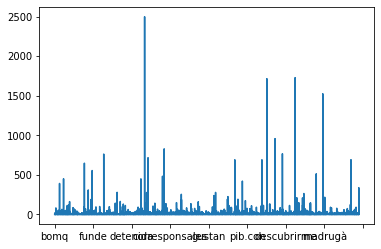

In [ ]:
v.plot()

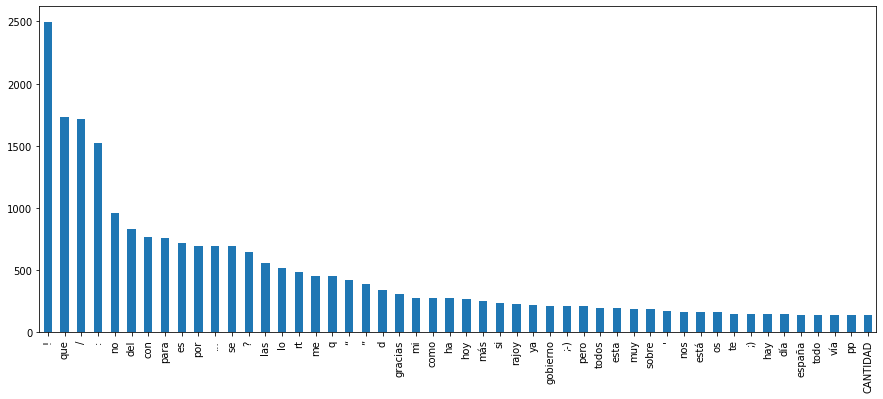

In [ ]:
plt.figure(figsize=(15,6))
v.sort_values(ascending=False, inplace=True)
v.iloc[0:50].plot(kind="bar")

In [ ]:
import wordcloud

(-0.5, 399.5, 199.5, -0.5)

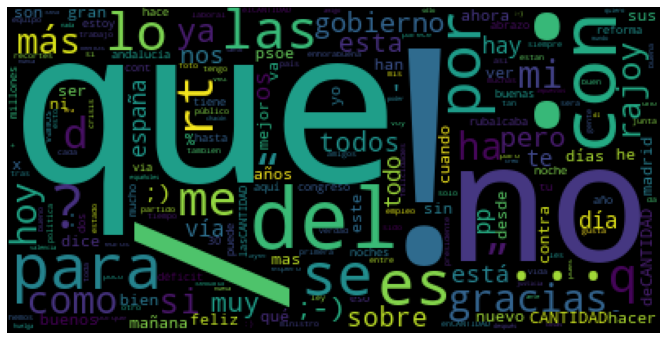

In [ ]:
plt.figure(figsize=(15,6))
wc = wordcloud.WordCloud()
wc.generate_from_frequencies(v)
plt.imshow(wc)
plt.axis("off")